In [ ]:
# importamos módulos

In [19]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from math import comb

# Caso de uso

___Default of Credit Card Clients Dataset:___

* Conjunto de datos sobre incumplimiento de pagos con tarjeta de crédito.
* https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv

In [ ]:
# leemos los datos previamente descargados

In [3]:
import os
os.getcwd()
os.chdir('/content/sample_data')

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv')

Ejercicio 1: obtener las dimensiones de df.

In [ ]:
df.shape

(30000, 25)

Ejercicio 2: mostrar las primeras 10 filas de df.

In [ ]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


Vemos que todas las columnas son numéricas. Para ver a qué se corresponde cada columna y qué significan sus valores, podéis ir al enlace que tenéis adjunto más arriba.

La columna "default.payment.next.month" hace referencia a si en el siguiente mes se incumplieron los pagos, valiendo 1 si es el caso y 0 en caso contrario. Esta sería la variable objetivo para un problema de aprendizaje automático supervisado. Aquí nos centramos en el aprendizaje no supervisado, así que prescindiremos de ella columna. Sin embargo, la guardaremos aparte para luego utilizarla como métrica externa.

Ejercicio 3: guardar la columna "default.payment.next.month" como un pandas Series y eliminarla de df.

In [9]:
target=pd.Series(df['default.payment.next.month'])
df=df.drop(columns='default.payment.next.month')

Ejercicio 4: explorar si alguna columna es identificador único y, por tanto, prescindible. En tal caso, eliminar la columna.

In [7]:
df.shape[0]==len(df['ID'].unique())

True

In [10]:
df['ID'].unique()
df=df.drop(columns='ID')

Ejercicio 5: mostrar el histograma de cada variable.

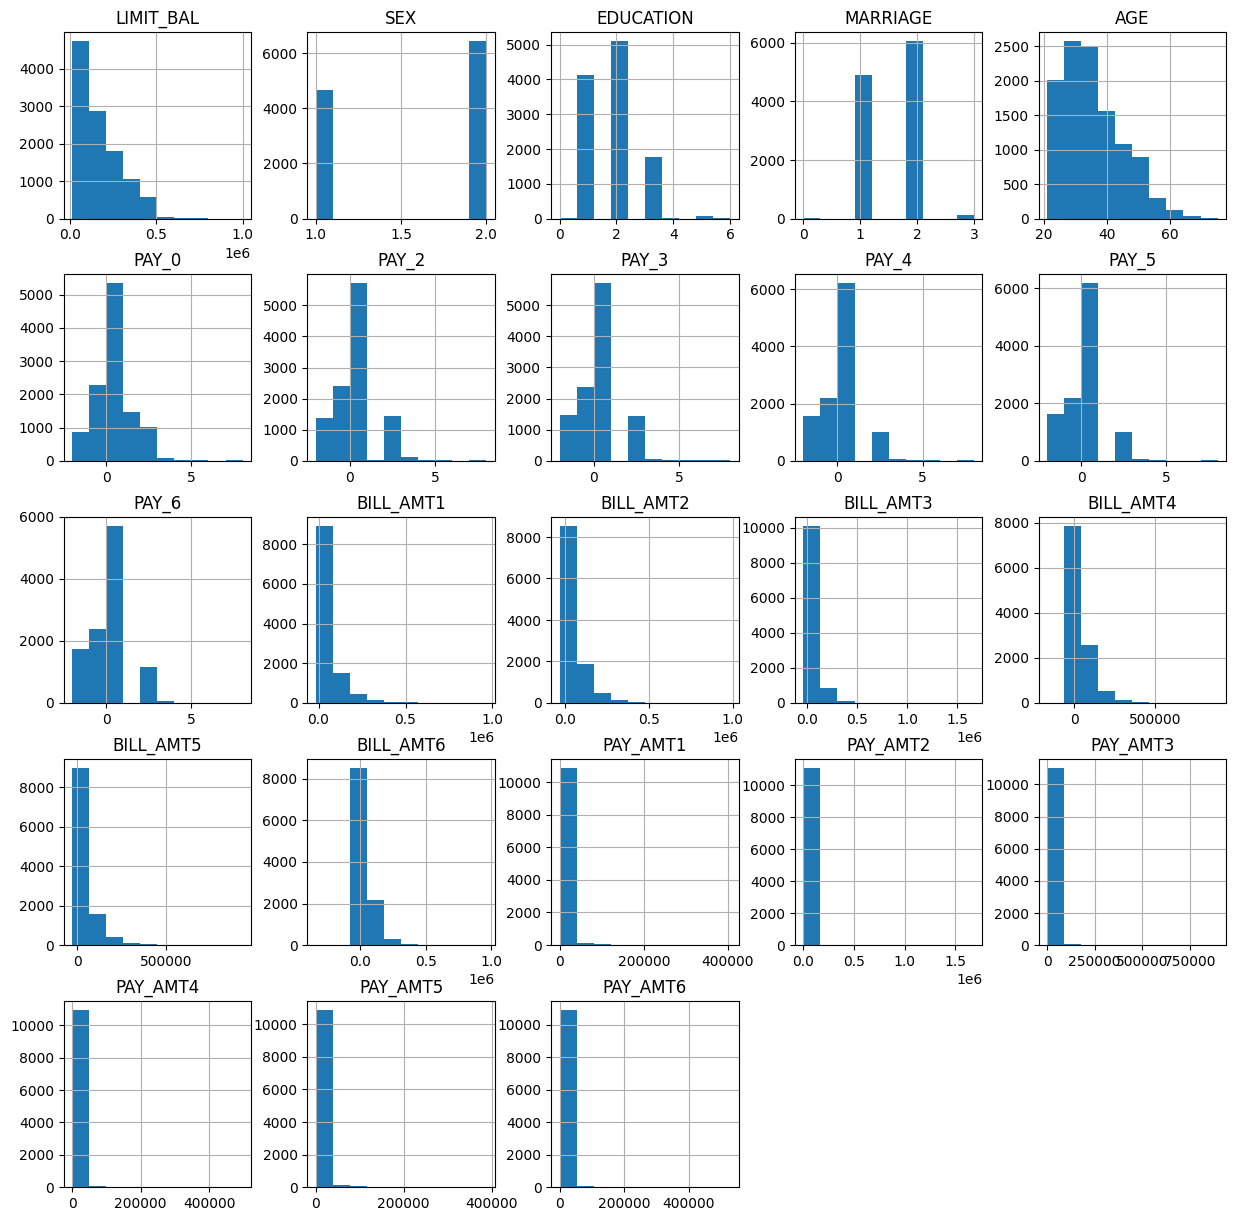

In [20]:
df.hist(figsize=(15,15))
plt.show()

Ejercicio 6: comprobar si hay valores perdidos.

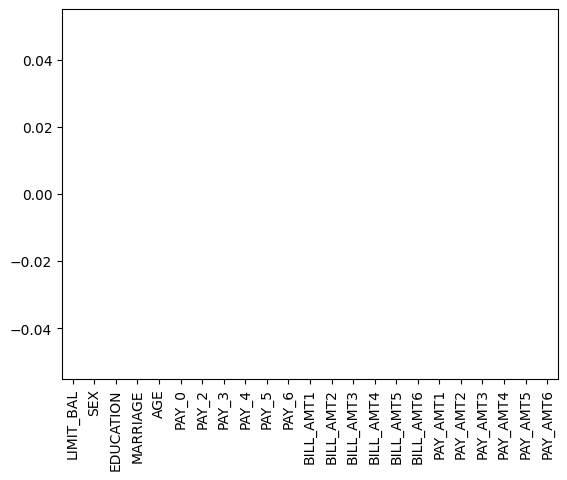

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.show()

# Principal Component Analysis

Como es bien sabido, el _Principal Componente Analysis_ es especialmente útil cuando los datos a considerar están correlacionados.

Ejercicio 7: encontrar las correlaciones entre las distintas columnas de df.

In [14]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024198,-0.232089,-0.121465,0.149867,-0.240010,-0.285142,-0.276837,-0.249537,-0.236378,-0.228136,0.282409,0.278438,0.284201,0.296937,0.286418,0.279386,0.215795,0.188607,0.226371,0.205101,0.209016,0.232512
SEX,0.024198,1.000000,0.020099,-0.028227,-0.092597,-0.049249,-0.065023,-0.059611,-0.053299,-0.050533,-0.029901,-0.033669,-0.028323,-0.019232,-0.016931,-0.009961,-0.012743,-0.002482,-0.001807,-0.008541,0.002362,-0.011083,-0.004039
EDUCATION,-0.232089,0.020099,1.000000,-0.135858,0.174841,0.112799,0.134902,0.120970,0.108573,0.100473,0.087110,0.021203,0.017356,0.003817,-0.008042,-0.004839,-0.003060,-0.043954,-0.044987,-0.040127,-0.028750,-0.037926,-0.037521
MARRIAGE,-0.121465,-0.028227,-0.135858,1.000000,-0.421114,0.017796,0.029223,0.034862,0.038861,0.043704,0.040349,-0.028623,-0.031712,-0.036314,-0.033001,-0.036135,-0.029720,-0.034813,-0.024864,-0.021828,-0.025901,-0.006903,-0.009229
AGE,0.149867,-0.092597,0.174841,-0.421114,1.000000,-0.032433,-0.054643,-0.059639,-0.053727,-0.058892,-0.055050,0.053622,0.049192,0.046528,0.039094,0.039273,0.042486,0.031125,0.026352,0.039136,0.036425,0.030758,0.023127
PAY_0,-0.240010,-0.049249,0.112799,0.017796,-0.032433,1.000000,0.650932,0.549615,0.510954,0.471805,0.432335,0.182150,0.184982,0.171451,0.178097,0.181789,0.178310,-0.099863,-0.079804,-0.068809,-0.068788,-0.046560,-0.069733
PAY_2,-0.285142,-0.065023,0.134902,0.029223,-0.054643,0.650932,1.000000,0.768844,0.675926,0.627414,0.568830,0.243323,0.244447,0.231129,0.237178,0.237621,0.231992,-0.082462,-0.065386,-0.048370,-0.052310,-0.028300,-0.043973
PAY_3,-0.276837,-0.059611,0.120970,0.034862,-0.059639,0.549615,0.768844,1.000000,0.795190,0.701582,0.632622,0.209217,0.236817,0.227078,0.235324,0.234909,0.229380,-0.000625,-0.066568,-0.040890,-0.048045,-0.026715,-0.042169
PAY_4,-0.249537,-0.053299,0.108573,0.038861,-0.053727,0.510954,0.675926,0.795190,1.000000,0.829416,0.718766,0.218771,0.240189,0.260925,0.270538,0.270501,0.263694,-0.008152,0.003020,-0.058116,-0.035580,-0.025427,-0.027430
PAY_5,-0.236378,-0.050533,0.100473,0.043704,-0.058892,0.471805,0.627414,0.701582,0.829416,1.000000,0.805216,0.215022,0.232791,0.250766,0.286524,0.286226,0.276588,-0.010834,-0.005506,0.013112,-0.055871,-0.029513,-0.029564


Ejercicio 8: ¿Encontráis algunos grupos de columnas en los que las correlaciones entre variables sean especialmente altas?

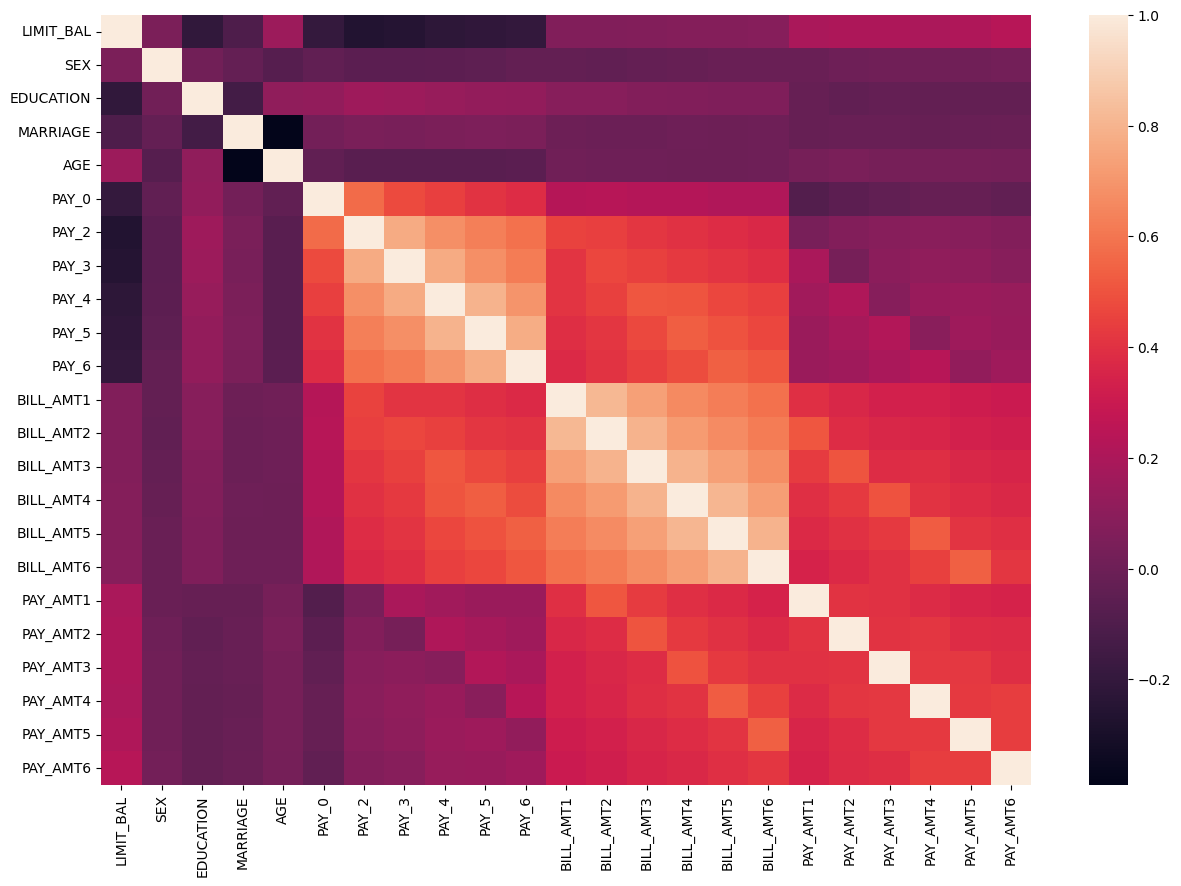

In [15]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.heatmap(df.corr(method='kendall'), ax=ax);

Procedemos a hacer PCA.

Antes de hacer el ejercicio, adjuntamos una función para visualizar el rendimiento de los modelos.

In [12]:
# Definimos una función para mostrar el rendimiento del modelo de PCA
def pca_importance(pca):
    '''
    Dado un modelo de PCA, esta función muestra una curva con la cantidad
    de varianza que obtiene el modelo en función del número de componentes,
    además de barras con la cantidad de varianza que aporta la nueva componente.
    '''
    components = pca.components_  # Axis of maximum variation
    n = len(components)
    x = np.arange(n) + 1
    values = pca.explained_variance_ratio_ * 100
    acvalues = np.cumsum(values)

    fig, ax = plt.subplots(figsize=(18, 6))
    plt.xlim(0.5, x.max() + 1.5)

    ax.bar(x, values)
    ax.plot(x, acvalues)
    for i in x:
        ax.annotate("{}%".format(round(values[i - 1], 2)), (i-.1, values[i - 1]),
                    fontsize=15)
        ax.annotate("{}%".format(round(acvalues[i - 1], 2)), (i-.1, acvalues[i - 1]),
                    fontsize=15)
    ax.set_xlabel("Número de componentes")
    ax.set_ylabel("Variabilidad (%)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Ejercicio 9: hacer PCA sobre todas las variables estandarizándolas previamente.

_Pista: usar StandardScaler() y luego PCA()._

In [18]:
# Construcción de X
X = df.copy()

# Estrategia de escalado: Z-score = la media de cadsa variable dividida por su desv.estándar
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Aplicación de PCA conservando el 95% de la varianza
pca = PCA(n_components=0.999)#Nos quedamos con aquel número de componentes que explican el 95% de la varianza
X_pca = pca.fit_transform(X_sc)
#Son 15 componentes los que explican el 95% de la varianza
# Representación de la varianza explicada por cada componente
pca_importance(pca)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ejercicio 10: hacer PCA para los distintos grupos de variables correlacionadas, estandarizando también las variables.

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


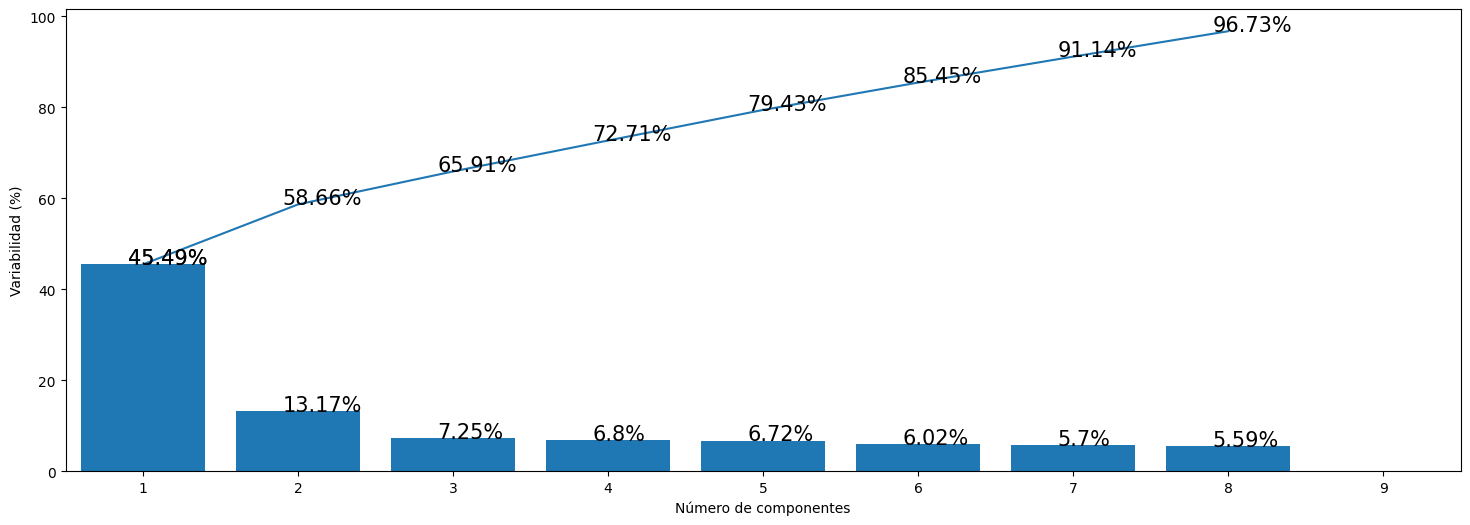

In [ ]:
#Variables continuaas
# Construcción de X
col_float = df.select_dtypes(include=float).columns
print(col_float)
X = df[col_float]
# Estrategia de escalado: Z-score = la media de cada variable dividida por su desv.estándar
sc = StandardScaler()
X_sc=sc.fit_transform(X)

# Aplicación de PCA conservando el 95% de la varianza
pca = PCA(n_components=0.95)#Nos quedamos con aquel número de componentes que explican el 95% de la varianza
X_pca = pca.fit_transform(X_sc)
#Son 8 componentes los que explican el 95% de la varianza
# Representación de la varianza explicada por cada componente
pca_importance(pca)

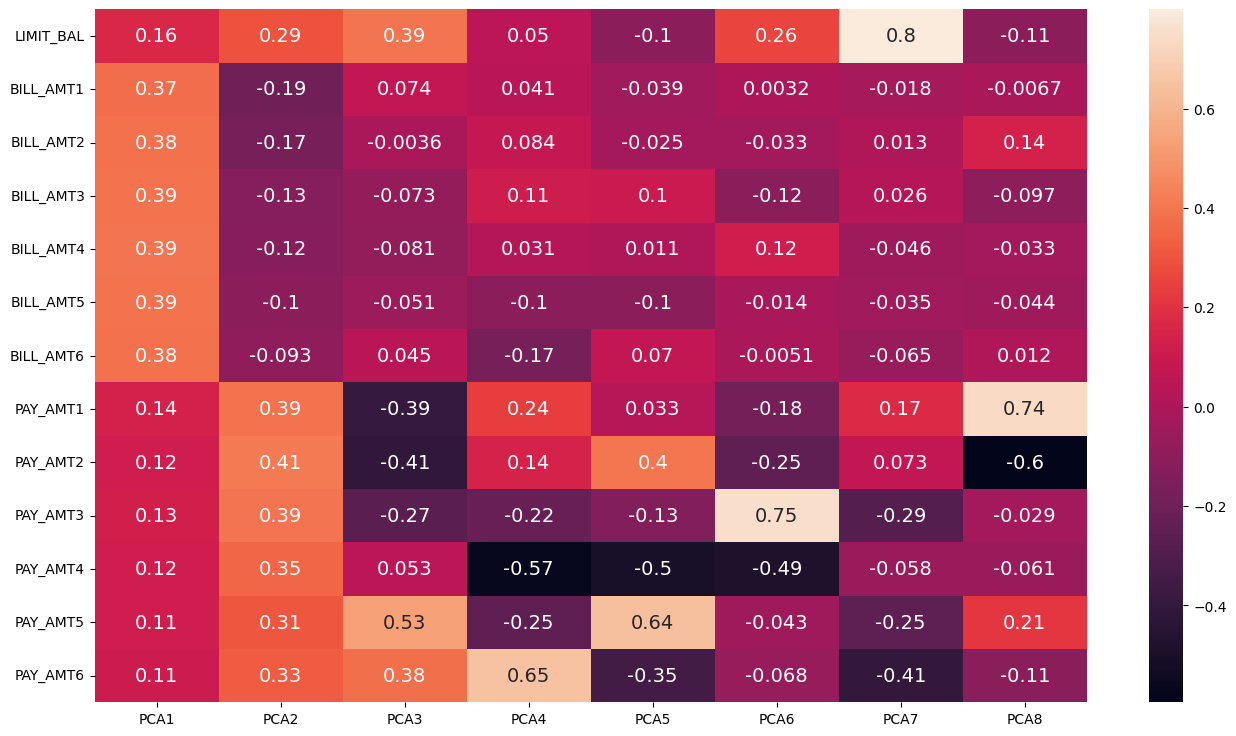

In [ ]:
# Sacamos la matriz de pesos del PCA
component_names = ['PCA{}'.format(i) for i in range(1, pca.components_.shape[0] + 1)]
loadings = pd.DataFrame(
                            pca.components_.T,  # transpose the matrix of loadings
                            columns=component_names,  # so the columns are the principal components
                            index=df[col_float].columns,  # and the rows are the original features
                        )
fig, ax = plt.subplots(1,1, figsize=(16, 9))
sns.heatmap(loadings, annot=True, ax=ax, annot_kws={"size": 14});

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

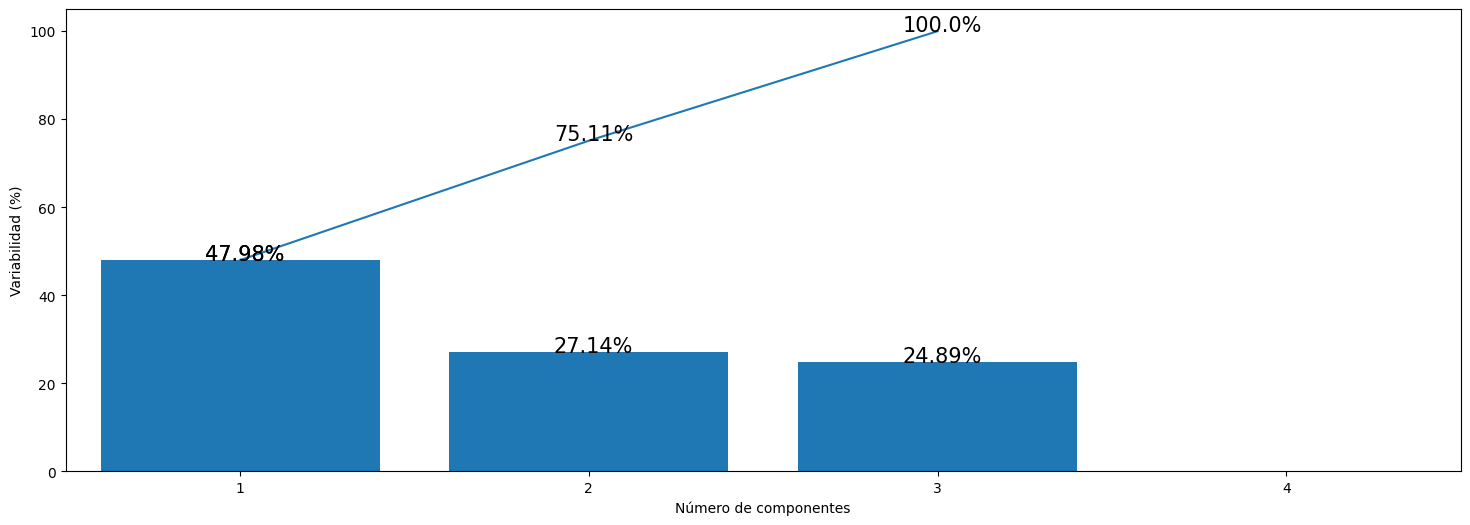

In [ ]:
var_corr = ['LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT3']
X = df[var_corr]
# Estrategia de escalado: Z-score = la media de cada variable dividida por su desv.estándar
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Aplicación de PCA conservando el 95% de la varianza
pca = PCA(n_components=0.95)#Nos quedamos con aquel número de componentes que explican el 95% de la varianza
X_pca = pca.fit_transform(X_sc)
#Son 3 componentes los que explican el 95% de la varianza
# Representación de la varianza explicada por cada componente
pca_importance(pca)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')


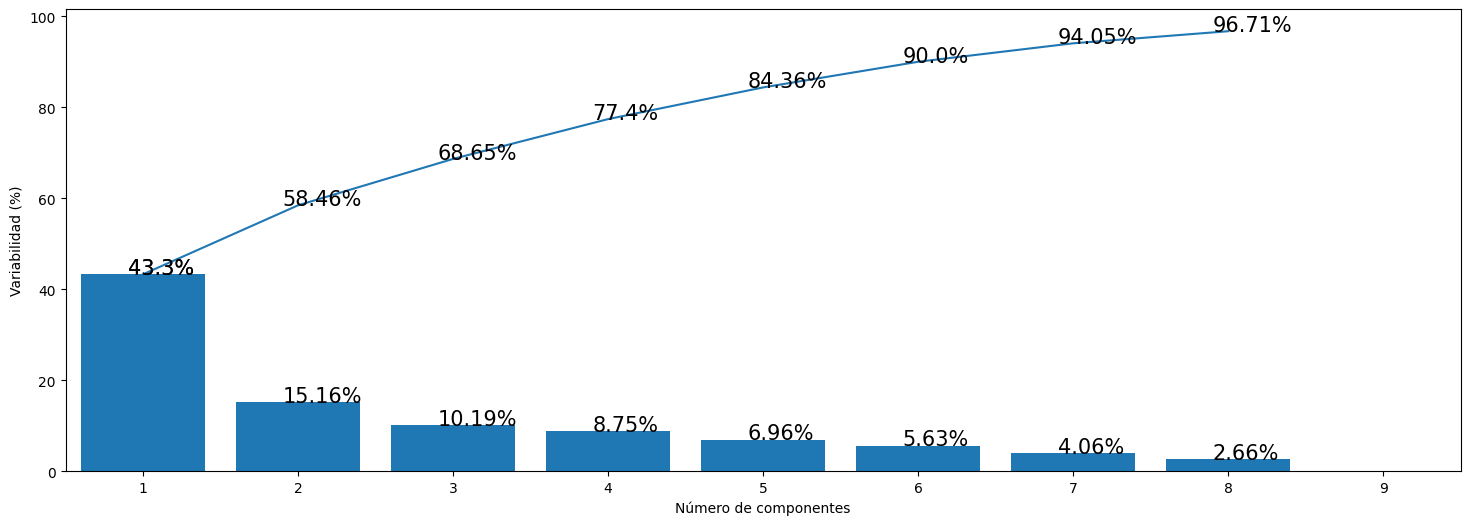

In [ ]:
#Variables discretas
# Construcción de X
col_int = df.select_dtypes(include=int).columns
print(col_int)
X = df[col_int]

# Estrategia de escalado: Z-score = la media de cada variable dividida por su desv.estándar
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Aplicación de PCA conservando el 95% de la varianza
pca = PCA(n_components=0.95)#Nos quedamos con aquel número de componentes que explican el 95% de la varianza
X_pca = pca.fit_transform(X_sc)
#Son 8 componentes los que explican el 95% de la varianza
# Representación de la varianza explicada por cada componente
pca_importance(pca)

Ejercicio 11: En nuestra tabla de datos todas las variables toman valores numéricos (sean reales o enteros). Ahora bien, ¿hasta qué punto tiene sentido considerarlas todas para los análisis que hemos hecho en los ejercicios anteriores? Es decir, ¿para todas y cada una de ellas tiene sentido estudiar sus correlaciones con el resto y hacer un análisis de componentes principales?

Respuesta: ...

# _Clustering_ jerárquico

Adjuntamos una función para representar dendrogramas:

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Crea la matriz de conexiones y después genera la imagen

    # crea la cuenta de muestras en cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Dibuja el dendrograma
    dendrogram(linkage_matrix, **kwargs)

Ejercicio 12: crear modelos de _clustering_ jerárquico con los métodos _ward_ y _single linkage_. Utilizar solo las columnas "LIMIT_BAL" y "PAY_0", ya estandarizadas (deberíais tenerlas estandarizadas ya de anteriores ejercicios). Hacer las representaciones gráficas que se consideren pertinentes.

_Pista: usar AgglomerativeClustering() y especificar el método con el argumento "linkage"._

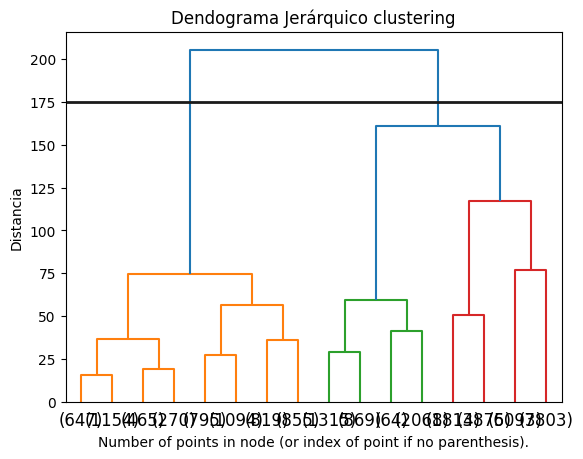

In [ ]:
# WARD
X = df.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X[['LIMIT_BAL', 'PAY_0']])

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_sc)
plt.title('Dendograma Jerárquico clustering')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distancia")
plt.axhline(y=175, color='k', linestyle='-', linewidth=2)#Corte a una distancia de 175 para tener 2 clústers acordes a los 2 target con 8 nodos cada uno
plt.show()

cluster
0    23901
1     6099
Name: count, dtype: int64


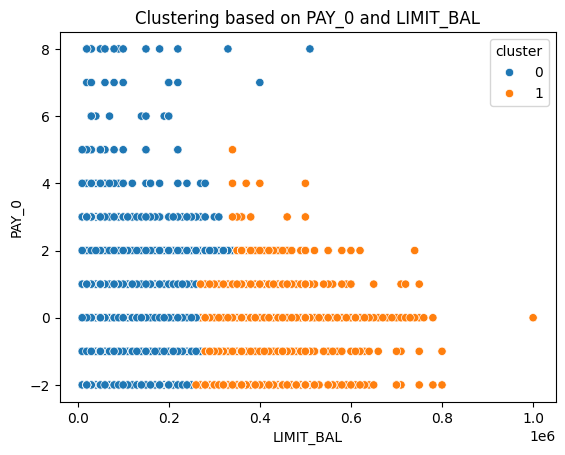

In [ ]:
X = df.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X[['LIMIT_BAL', 'PAY_0']])

agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_ward.fit(X_sc)

X['cluster'] = agg_ward.labels_

print(X.cluster.value_counts().sort_index())# Igual a 30.000

ax = sns.scatterplot(x='LIMIT_BAL', y='PAY_0', hue='cluster', data=X)
ax.set(title='Clustering based on PAY_0 and LIMIT_BAL');

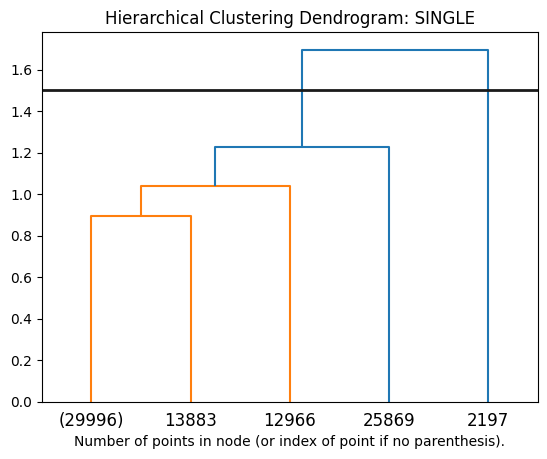

In [ ]:
#SINGLE LINKAGE
X = df.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X[['LIMIT_BAL', 'PAY_0']])

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')

model = model.fit(X_sc)

plt.title('Hierarchical Clustering Dendrogram: SINGLE')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=1.5, color='k', linestyle='-', linewidth=2)
plt.show()

cluster
0    29999
1        1
Name: count, dtype: int64


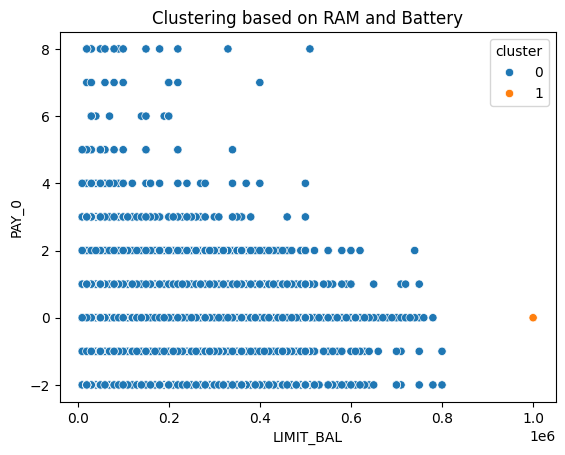

In [ ]:
X = df.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X[['LIMIT_BAL', 'PAY_0']])


agg_sin = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_sin.fit(X_sc)
X['cluster'] = agg_sin.labels_

print(X.cluster.value_counts().sort_index())


ax = sns.scatterplot(x='LIMIT_BAL', y='PAY_0', hue='cluster', data=X)
ax.set(title='Clustering based on RAM and Battery');


# K-Means

Ejercicio 13: hacer modelos de K-Means utilizando de nuevo "LIMIT_BAL" y "PAY_0" ya estandarizadas. Hacer un modelo para 2, 3, 4, 5, 6 y 7 _clusters_. Realizar las representaciones gráficas pertinentes.

_Pista: usar KMeans() y especificar el número de clusters con el argumento "n_clusters"._

cluster
0    4851
1    9656
2    5382
3    2994
4    2219
5    2469
6    2429
Name: count, dtype: int64


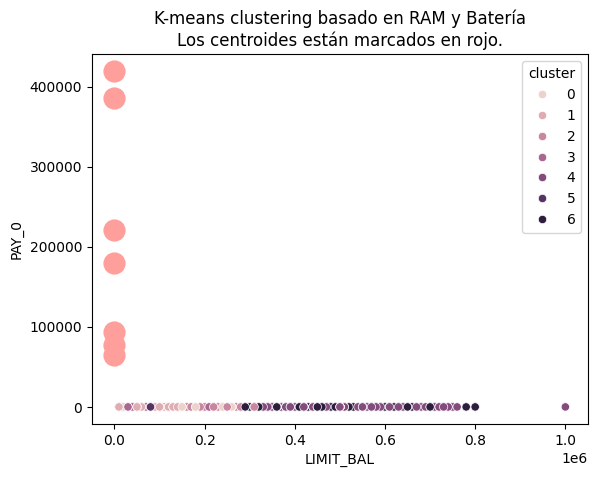

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,cluster
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,3
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1


In [ ]:
# K-MEANS

X = df.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X[['LIMIT_BAL', 'PAY_0']])

kmeans = KMeans(n_clusters=7, init="k-means++", n_init=4)
kmeans.fit(X_sc)

X['cluster'] = kmeans.labels_

print(X.cluster.value_counts().sort_index())


ax = sns.scatterplot(x='LIMIT_BAL', y='PAY_0', hue='cluster', data=X)
ax.set(title='Clustering based on RAM and Battery');

centroids = sc.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 1], centroids[:, 0], marker="o", s=169, linewidths=3,
            color="r", zorder=10)
plt.title("K-means clustering basado en RAM y Batería\n"
          "Los centroides están marcados en rojo.")
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()

X.head()


# Métricas externas

Pasamos a caracterizar nuestros modelos no supervisados con métricas externas. Recordemos que el conjunto de datos contenía etiquetas reales (la columna "default.payment.next.month", que vale 0 o 1).

Ejercicio 14: Antes de ponernos a calcular métricas externas, teniendo en cuenta los valores que puede tomar la variable objetivo ("default.payment.next.month"), ¿cuál de los modelos no supervisados que hemos visto crees que es más convenienite para cuantificar unas métricas externas?

Respuesta:

...

Como métrica externa, consideraremos aquí la homogeneidad y la completitud que visteis en las clases prácticas. Recordemos que una segmentación es homogénea si todos sus _clusters_ contienen elementos de una única clase y es completa si todos los elementos de una clase están en el mismo _cluster_.

Ejercicio 15: Con el modelo que hayas elegido en el punto anterior, calcular la completitud y la homogeneidad del modelo comparada con "default.payment.next.month".

In [ ]:
# Respuesta


Vemos que se trata de unos resultados bastante pobres. Esto puede indicar que las columnas utilizadas no fueron las mejores, por ejemplo. También puede ser que fuera poco realista pensar que solo con dos columnas iba a ser suficiente para sacar algo con sentido.

# Métricas internas

Ejercicio 16: Calcular la inercia de los distintos modelos con K-Means con entre 2 y 7 _clusters_ y representarla en función del número de _clusters_, para así, con el método del codo, tratar de determinar el número ideal.

In [ ]:
# Respuesta (sigue en la siguiente celda)
